# Null geodesics in Schwarzschild spacetime

This Jupyter/SageMath notebook is relative to the lectures
[Geometry and physics of black holes](http://luth.obspm.fr/~luthier/gourgoulhon/bh16/).

Click [here](https://raw.githubusercontent.com/egourgoulhon/BHLectures/master/sage/ges_null_geod.ipynb) to download the notebook file (ipynb format). To run it, you must start SageMath with `sage -n jupyter`.

In [1]:
version()

'SageMath version 9.0.beta3, Release Date: 2019-10-26'

In [2]:
%display latex

## Schwarzschild metric

In [3]:
M = Manifold(4, 'M', structure='Lorentzian')
X.<t, r, th, ph> = M.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):periodic:\phi')
X

Chart (M, (t, r, th, ph))

In [4]:
g = M.metric()
m = 1
g[0,0] = -(1-2*m/r)
g[1,1] = 1/(1-2*m/r)
g[2,2] = r^2
g[3,3] = (r*sin(th))^2
g.display()

g = (2/r - 1) dt*dt - 1/(2/r - 1) dr*dr + r^2 dth*dth + r^2*sin(th)^2 dph*dph

In [5]:
Xcart.<t, x, y, z> = M.chart()
X_to_Xcart = X.transition_map(Xcart, [t, r*sin(th)*cos(ph), r*sin(th)*sin(ph), r*cos(th)])
X_to_Xcart.display()

t = t
x = r*cos(ph)*sin(th)
y = r*sin(ph)*sin(th)
z = r*cos(th)

In [6]:
M.top_charts()

[Chart (M, (t, r, th, ph)), Chart (M, (t, x, y, z))]

In [7]:
M._top_charts = [X]
M.top_charts()

[Chart (M, (t, r, th, ph))]

In [8]:
M.identity_map().coord_functions(X, Xcart)

Coordinate functions (t, r*cos(ph)*sin(th), r*sin(ph)*sin(th), r*cos(th)) on the Chart (M, (t, r, th, ph))

## Some selected null geodesics

In [9]:
def initial_vector(r0, b, ph0=0, E=1, inward=False):
    t0, th0 = 0, pi/2
    L = b*E
    vt0 = 1/(1-2*m/r0)
    vr0 = sqrt(E^2 - L^2/r0^2*(1-2*m/r0))
    if inward:
        vr0 = - vr0
    vth0 = 0
    vph0 = L / r0^2
    p0 = M((t0, r0, th0, ph0), name='p_0')
    return M.tangent_space(p0)((vt0, vr0, vth0, vph0), name='v_0')

### The photon orbit

In [10]:
r0 = 3
ph0 = 0
b = 3*sqrt(3)
E = 1
print("b = {} m".format(float(b)))

b = 5.196152422706632 m


In [11]:
v0 = initial_vector(r0, b)
v0.display()

v_0 = 3 d/dt + 1/3*sqrt(3) d/dph

In [12]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0

In [13]:
s = var('s')
geod = M.integrated_geodesic(g, (s, 0, 100), v0)
geod

Integrated geodesic in the 4-dimensional Lorentzian manifold M

In [14]:
sol = geod.solve(step=0.01, method="ode_int")       # numerical integration
interp = geod.interpolate()              # interpolation of the solution for the plot

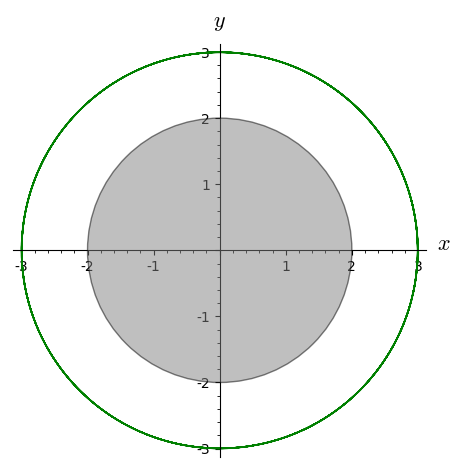

In [15]:
graph = circle((0, 0), 2*m, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                             aspect_ratio=1, color='green')        
graph

### Other null geodesics

In [16]:
U(r) = (1 - 2/r)/r^2

In [17]:
U1 = 0.02
b = 1/sqrt(U1)
print("b = {} m".format(b))
r0 = 10
v0 = initial_vector(r0, b, inward=True)
v0.display()

b = 7.07106781186548 m


v_0 = 5/4 d/dt - 0.774596669241483 d/dr + 0.0707106781186548 d/dph

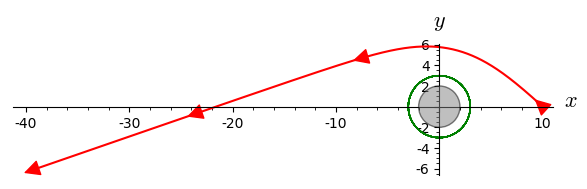

In [18]:
geod = M.integrated_geodesic(g, (s, 0, 50), v0)
sol = geod.solve(step=0.01, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='red', thickness=1.5,
                              display_tangent=True, color_tangent='red', 
                              plot_points_tangent=4, scale=1) 
graph

In [19]:
U1 = 0.04
b = 1/sqrt(U1)
print("b = {} m".format(b))
r0 = 10
v0 = initial_vector(r0, b, inward=True)
v0.display()

b = 5.00000000000000 m


v_0 = 5/4 d/dt - 0.894427190999916 d/dr + 0.0500000000000000 d/dph

In [20]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

0.000000000000000

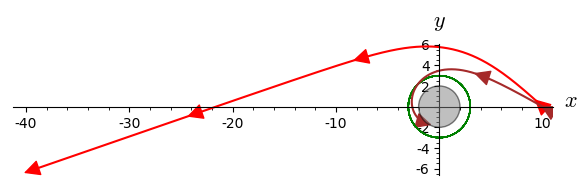

In [21]:
geod = M.integrated_geodesic(g, (s, 0, 13.25), v0)
sol = geod.solve(step=0.001, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='brown', thickness=1.5,
                              display_tangent=True, color_tangent='brown', 
                              plot_points_tangent=3, scale=0.2) 
graph

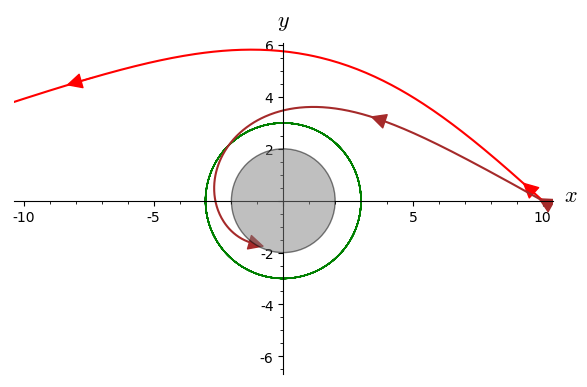

In [22]:
show(graph, xmin=-10)

In [23]:
U1 = 0.046
b = 1/sqrt(U1)
print("b = {} m".format(b))
r0 = 2.1
v0 = initial_vector(r0, b)
v0.display()

b = 4.66252404120157 m


v_0 = 21.0000000000000 d/dt + 0.874792273707413 d/dr + 1.05726168734729 d/dph

In [24]:
p0 = v0.parent().base_point()
g.at(p0)(v0, v0)

4.440892098500626e-15

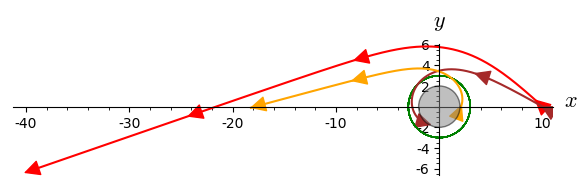

In [25]:
geod = M.integrated_geodesic(g, (s, 0, 20), v0)
sol = geod.solve(step=0.001, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='orange', thickness=1.5,
                              display_tangent=True, color_tangent='orange', 
                              plot_points_tangent=3, scale=0.1)       
graph

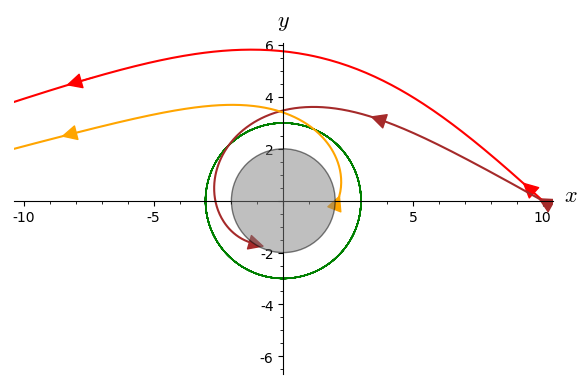

In [26]:
show(graph, xmin=-10)

In [27]:
U1 = 0.035
b = 1/sqrt(U1)
print("b = {} m".format(b))
r0 = 2.4
v0 = initial_vector(r0, b, ph0=-pi/2)
v0.display()

b = 5.34522483824849 m


v_0 = 6.00000000000000 d/dt + 0.416269652125186 d/dr + 0.927990423307029 d/dph

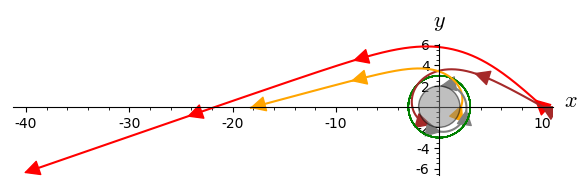

In [28]:
geod = M.integrated_geodesic(g, (s, 0, 3.5), v0)
sol = geod.solve(step=0.001, method="ode_int") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='grey', thickness=1.5,
                              display_tangent=True, color_tangent='grey', 
                              plot_points_tangent=3, scale=0.1) 
graph

In [29]:
graph += text('1', (5, 4.5), color='red' ) \
         + text('2', (3, 3.8), color='brown' ) \
         + text('3', (-6, 3.5), color='orange' ) \
         + text('4', (0.7, -2.7), color='grey' )

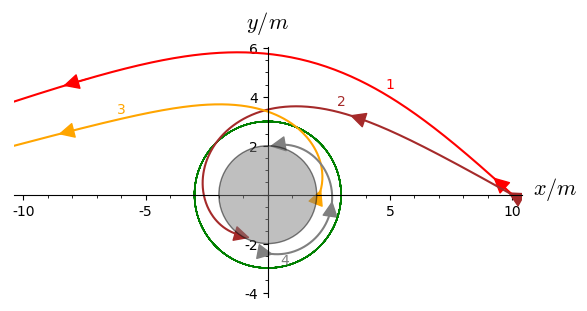

In [30]:
show(graph, xmin=-10, ymin=-4, axes_labels=[r'$x/m$', r'$y/m$'])

In [31]:
graph.save("ges_null_geod.pdf", xmin=-10, ymin=-4, axes_labels=[r'$x/m$', r'$y/m$'])

## Geodesics arising from a source at large distance

In [32]:
r0 = 100  # distance of the source

In [33]:
b_sel = [15., 10., 7., 6., 5.5, 5.23, 5.22, 5.2025, 5.198, 5.197, 5.1965, 5.19632]
b_pec = [5.355, 5.2025, 5.19632]

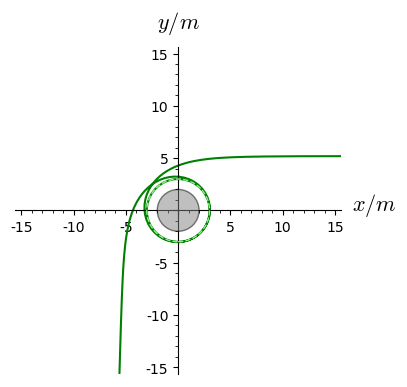

In [50]:
graph = circle((0, 0), 2*m, edgecolor='black', fill=True, facecolor='grey', alpha=0.5)
graph += circle((0, 0), 3*m, color='lightgreen', thickness=1., linestyle='--')
b = 5.196155
ph0 = asin(b/r0)
v0 = initial_vector(r0, b, ph0=ph0, inward=True)
#show(v0.display())
geod = M.integrated_geodesic(g, (s, 0, 150), v0)
sol = geod.solve(step=0.001, method="ode_int", rtol=1.e-12, atol=1.e-12) 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='green', thickness=1.5) 
show(graph, xmin=-15, xmax=15, ymin=-15, ymax=15, axes_labels=[r'$x/m$', r'$y/m$'])

In [51]:
graph.save("test.pdf", xmin=-15, xmax=15, ymin=-15, ymax=15, 
           axes_labels=[r'$x/m$', r'$y/m$'])

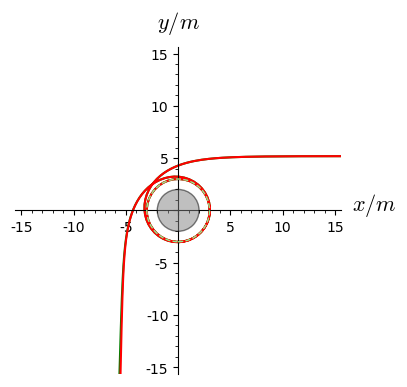

In [52]:
geod = M.integrated_geodesic(g, (s, 0, 150), v0)
sol = geod.solve(step=0.02, method="rkf45") 
interp = geod.interpolate()   
graph += geod.plot_integrated(chart=Xcart, ambient_coords=(x,y), plot_points=500, 
                              aspect_ratio=1, color='red', thickness=1.5) 
show(graph, xmin=-15, xmax=15, ymin=-15, ymax=15, axes_labels=[r'$x/m$', r'$y/m$'])